# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


# 1.1 Reading data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')


In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.project_is_approved.value_counts()


Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


1    92706
0    16542
Name: project_is_approved, dtype: int64

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 preprocessing of project_subject_categories

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


# 1.3 preprocessing of project_subject_subcategories

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 preprocessing of project grade categories

In [7]:
#preprocess project grade category
print(project_data['project_grade_category'].values[0])
print("="*50)
print(project_data['project_grade_category'].values[150])
print("="*50)
print(project_data['project_grade_category'].values[1000])
print("="*50)
print(project_data['project_grade_category'].values[20000])
print("="*50)


project_data['project_grade_category'].value_counts()

Grades PreK-2
Grades 3-5
Grades 3-5
Grades PreK-2


Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [8]:
preprocessed_project_grade_categories= []

for grade_cat in tqdm(project_data["project_grade_category"]):
   
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
   
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())

100%|██████████████████████████████| 109248/109248 [00:01<00:00, 101649.13it/s]


In [9]:
print(preprocessed_project_grade_categories[1])
print("="*50)
print(preprocessed_project_grade_categories[50])
print("="*50)
print(preprocessed_project_grade_categories[500])
print("="*50)
print(preprocessed_project_grade_categories[5000])
print("="*50)
print(preprocessed_project_grade_categories[10001])

6_8
PreK_2
9_12
PreK_2
PreK_2


# 1.5 preprocessing of teacher prefix

In [10]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [11]:
def replace_cate(lst):          # Removing (.) in Mrs. 
    return lst.replace('.','')
   

project_data['teacher_prefix']= project_data['teacher_prefix'].astype(str).apply(replace_cate)

In [12]:
preprocessed_teacher_prefix = []

for teach_prefix in tqdm(project_data["teacher_prefix"]):
    
    preprocessed_teacher_prefix.append(teach_prefix.strip())

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 340091.83it/s]


In [13]:
print(preprocessed_teacher_prefix[1])
print("="*50)
print(preprocessed_teacher_prefix[50])
print("="*50)
project_data.teacher_prefix.value_counts()

Mr
Mrs


Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
null           3
Name: teacher_prefix, dtype: int64

 # clean titles preprocessing

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
title = decontracted(project_data['project_title'].values[2000])


In [153]:
# stopwords removed first then decontracted function is used

In [17]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = ' '.join(f for f in title.split() if f not in stopwords)
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    
    clean_titles.append(title.lower().strip())

100%|████████████████████████████████| 109248/109248 [00:13<00:00, 7892.61it/s]


In [18]:
project_data["clean_titles"] = clean_titles

In [19]:
project_data.drop(['project_title'], axis=1, inplace=True)

# Adding a new feature Number of words in title

In [20]:
title_word_count = []

In [21]:
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [22]:
project_data["title_word_count"] = title_word_count

In [23]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                        clean_titles  title_word_count  
0   educational support for english learners at home                 7  
1               wanted projector for hungry learners                 5  
2  soccer equipment for awesome middle school stu...                 7  
3                             techie kindergarteners                 2  
4                             interactive math tools                 3

# combining 4 essays into 1

In [24]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [25]:
ess = decontracted(project_data['essay'].values[2000])

In [26]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    
    clean_essay.append(ess.lower().strip())

100%|█████████████████████████████████| 109248/109248 [04:33<00:00, 399.38it/s]


In [27]:

project_data["clean_essays"] = clean_essay

In [28]:
project_data.drop(['essay'], axis=1, inplace=True)

# Adding new feature no of words in essay

In [29]:
essay_word_count=[]

In [30]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)
    

In [31]:
project_data["essay_word_count"] = essay_word_count

In [32]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                       clean_titles  title_word_count  \
0  educational support for english learners at home                 7   
1              wanted projector for hungry learners                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               164  
1  our students arrive school eager learn they po...               114

# Calculating sentiment scores of essay

In [154]:
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [33]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
analyser = SentimentIntensityAnalyzer()

In [35]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|████████████████████████████████| 109248/109248 [1:08:46<00:00, 26.01it/s]


In [38]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

In [39]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.3, stratify = project_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

In [41]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [42]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
20813      137296  p144387  0de3616dddaf24792ce9be27945a594a             Mr   
7577       116697  p079794  434568a57fb526bc54cdf0ad3d24ca71             Ms   

      school_state project_submitted_datetime project_grade_category  \
20813           CO        2017-04-29 22:25:56             Grades 6-8   
7577            CA        2016-09-01 01:44:58          Grades PreK-2   

                                         project_essay_1  \
20813  My students are part of an IB program and cons...   
7577   \"Let's go invent tomorrow.\" Steve Jobs. My s...   

                                         project_essay_2 project_essay_3  ...  \
20813  This is a course designed to introduce student...             NaN  ...   
7577   My students love to get the most out all of th...             NaN  ...   

      clean_categories       clean_subcategories  \
20813     Math_Science           AppliedSciences   
7577   AppliedLearning  College_CareerPrep Other   

                                            clean_titles title_word_count  \
20813  inspiring students to enter the gateway to tec...                8   
7577   31 blind mice wireless mice to click on our fu...               10   

                                            clean_essays essay_word_count  \
20813  my students part ib program consequently set h...              167   
7577   let is go invent tomorrow steve jobs my studen...              169   

         pos    neg    neu  compound  
20813  0.155  0.046  0.799    0.9556  
7577   0.351  0.054  0.595    0.9960  

[2 rows x 23 columns]

# one hot vector for clean categories of Projects (train,test,cv)

In [43]:
# we use count vectorizer to convert the values into one hot vectors 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (51236, 9)
Shape of matrix of Test data after one hot encoding  (32775, 9)
Shape of matrix of CV data after one hot encoding  (25237, 9)


# one hot vector for clean subcategories (train ,test,cv)

In [44]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (51236, 30)
Shape of matrix of Test data after one hot encoding  (32775, 30)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 30)


# One hot vector for school states(train,test,cv)

In [45]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [46]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [47]:
## Using count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (51236, 51)
Shape of matrix of Test data after one hot encoding  (32775, 51)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 51)


# one hot vector for Project grade category (train,test,cv)

In [48]:
my_counter = Counter()
for project_grade in preprocessed_project_grade_categories:
    my_counter.update(project_grade.split())

In [49]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [50]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['9_12', '6_8', '3_5', 'PreK_2']
Shape of matrix of Train data after one hot encoding  (51236, 4)
Shape of matrix of Test data after one hot encoding  (32775, 4)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 4)


# One hot vector for teacher prefix(train,test,cv)

In [51]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
Shape of matrix of Train data after one hot encoding (51236, 6) (51236,)
Shape of matrix of cv data after one hot encoding (25237, 6) (25237,)
Shape of matrix of Test data after one hot encoding (32775, 6) (32775,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


# 1.11 Vectorizing text data

## A) Bag of words (BOW with bigrams min_df=10,max features=5000)

### BOW train data essays

In [52]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)  #selecting top 5000 features
vectorizer_bow_essay.fit(X_train["clean_essays"])

text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (51236, 5000)


### bow test essays

In [53]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 5000)


### bow cv essays

In [54]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (25237, 5000)


### bow train titles

In [55]:
vectorizer_bow_title = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_bow_title.fit(X_train["clean_titles"])
title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (51236, 2771)


### bow test titles

In [56]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 2771)


### bow cv titles

In [57]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (25237, 2771)


#  Tfidf with bigrams min_df=10 and max_features =5000

###  tfidf train essays

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000) #Considering top 5000 features
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (51236, 5000)


### tfidf test essays

In [59]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 5000)


### tfidf cv essays

In [60]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (25237, 5000)


### tfidf train titles

In [62]:
vectorizer_tfidf_titles = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (51236, 2771)


### tfidf test titles

In [63]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 2771)


### tfidf cv titles

In [64]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)


Shape of matrix after one hot encoding  (25237, 2771)


# Using pretrained w2v

In [65]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## train essays

In [66]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|███████████████████████████████████| 51236/51236 [01:13<00:00, 697.56it/s]


51236
300


## test essays

In [67]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|███████████████████████████████████| 32775/32775 [00:48<00:00, 680.92it/s]


32775
300


## cv essays

In [68]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|███████████████████████████████████| 25237/25237 [00:36<00:00, 683.19it/s]


25237
300


# train titles

In [69]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 51236/51236 [00:03<00:00, 13620.57it/s]


51236
300


# test titles

In [70]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████| 32775/32775 [00:02<00:00, 13550.61it/s]


32775
300


# cv titles

In [71]:

# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████| 25237/25237 [00:01<00:00, 13464.57it/s]


25237
300


# using pretrained models : Tfidf weighted W2V

## train essays

In [72]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [73]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████| 51236/51236 [08:28<00:00, 100.78it/s]


51236
300


## test essays

In [74]:

# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|████████████████████████████████████| 32775/32775 [05:29<00:00, 99.40it/s]


32775
300


## cv essays

In [75]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|████████████████████████████████████| 25237/25237 [04:23<00:00, 95.77it/s]


25237
300


## train titles

In [76]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))

100%|██████████████████████████████████| 51236/51236 [00:07<00:00, 6494.13it/s]


51236


## test titles

In [78]:

# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████████████████████████████| 32775/32775 [00:05<00:00, 6317.83it/s]


32775
300


## cv titles

In [79]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████████████████████████████| 25237/25237 [00:03<00:00, 6730.47it/s]


25237
300


# 1.12  Vectorizing Numerical features

Various numerical feautures are :

1.Price

2.Quantity

3.Number of Projects previously proposed by Teacher

4.Title word Count ( introduced by us)

5.Essay word Count ( introduced by us)

6.Sentiments score

# 1 price

In [80]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(4)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98

In [81]:

# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')


In [82]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 2 quantity

In [83]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 3) Number of Projects previously proposed by Teacher

In [84]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


# 4) title word count

In [85]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 5) essay word count

In [86]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 6) Essay sentiments -positive

In [87]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(1,-1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 7) Essay sentiments-negative

In [88]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(1,-1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 8) Essay sentiments neutral

In [89]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(1,-1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 9) essay sentiments- compound

In [90]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(1,-1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(1,-1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# Assignment 5: Logistic Regression

[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets

: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW with bi-grams with min_df=10 and max_features=5000)

: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF with bi- grams with min_df=10 and max_features=5000) : categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

2 Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)

Find the best hyper parameter which will give the maximum AUC value

Find the best hyper paramter using k-fold cross validation or simple cross validation data

Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning

3 Representation of results

You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.

Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.

Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points. Please visualize your confusion matrices using seaborn heatmaps.

[Task-2] Apply Logistic Regression on the below feature set by finding the best hyper parameter as suggested in step 2 and step 3.

Consider these set of features school_state : categorical data clean_categories : categorical data clean_subcategories : categorical data project_grade_category :categorical data teacher_prefix : categorical data quantity : numerical data teacher_number_of_previously_posted_projects : numerical data price : numerical data sentiment score's of each of the essay : numerical data number of words in the title : numerical data number of words in the combine essays : numerical data And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3

Conclusion

You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library link 
There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
To avoid the issue of data-leakage, make sure to split your data first and then vectorize it.
While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
For more details please go through this link.

In [91]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))

essay_sent_pos_train = (X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = (X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = (X_test['pos'].values.reshape(-1,1))

essay_sent_neg_train = (X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = (X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = (X_test['neg'].values.reshape(-1,1))

essay_sent_neu_train = (X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = (X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = (X_test['neu'].values.reshape(-1,1))

essay_sent_comp_train = (X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = (X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = (X_test['compound'].values.reshape(-1,1))


# 3. Logistic Regression


## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW with bi-grams with min_df=10 and max_features=5000)

In [92]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [93]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 7876) (51236,)
(25237, 7876) (25237,)
(32775, 7876) (32775,)


#  A) gridsearch cv

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  38.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.8s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  49.5s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  55.1s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  27.2s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  28.5s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  34.5s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=  18.1s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=  14.8s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  5.8min finished


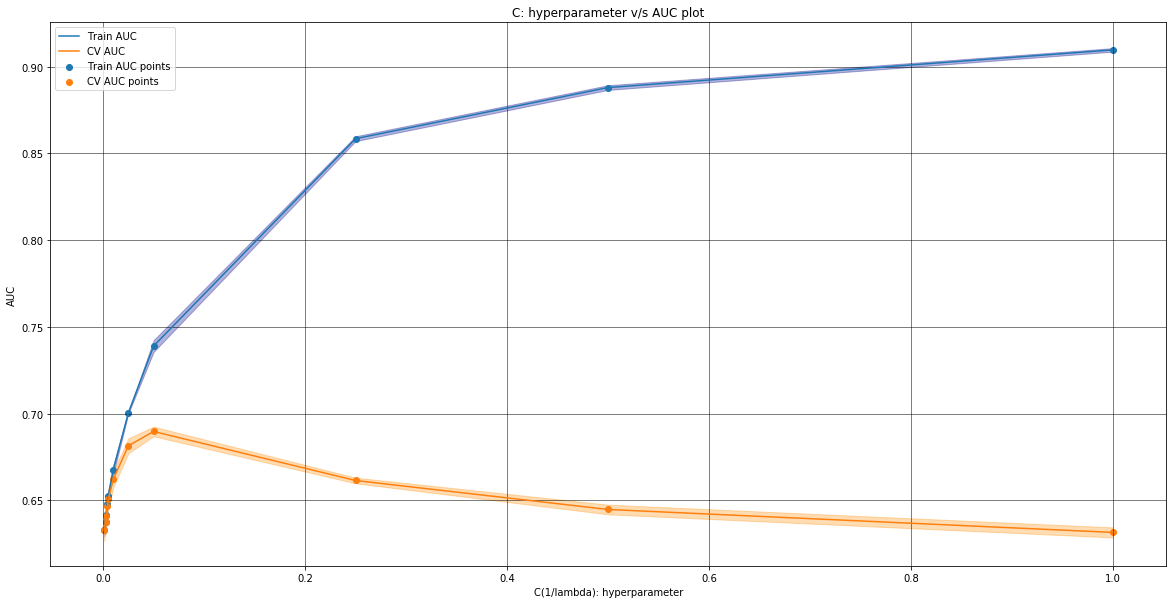

In [95]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')

parameters = {'C':[ 1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [96]:
best_c1=clf.best_params_
print(best_c1)

{'C': 0.05}


# Summary

- From the graph we observe that as value of C crosses 0.2 the gap between the lines widens up,so a small value Of C will be suitable

- At C= 0.05 we observe that gap between the lines is minimum,so consequently it is selected as best C

# B) training the model using best hyperparameter value

In [97]:

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

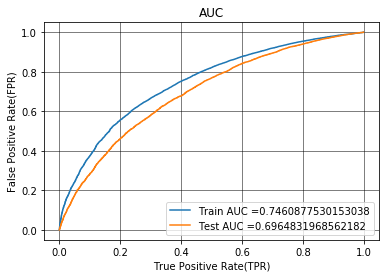

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = 0.05,penalty='l1',class_weight='balanced')

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We observe that train AUC= 0.74 and Test AUC = 0.69

# C)  confusion matrix

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

##  train data

In [100]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.427
[[ 3879  3879]
 [ 7779 35699]]


In [101]:

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.427


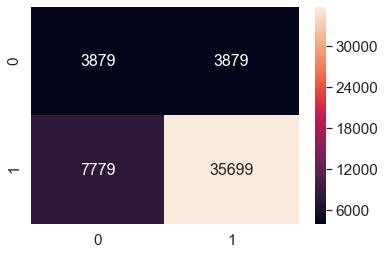

In [102]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe nearly 36k true positives

- The number of false positives and true negatives are same nearly 3900

- The no of false nehatives are 7779

## test data

In [103]:

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.498
[[ 3091  1872]
 [ 9399 18413]]


In [104]:

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.498


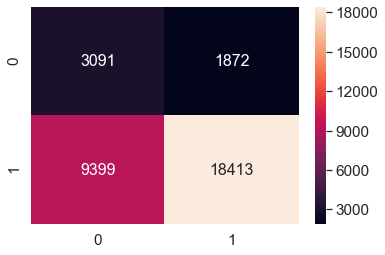

In [105]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# summary

- The number of true positives are very high(18413) while false negatives are close to 9400

- The no of false positives are least close to 1900

# set2 Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF with bi-grams with min_df=10 and max_features=5000

In [106]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [107]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 7876) (51236,)
(25237, 7876) (25237,)
(32775, 7876) (32775,)


# A) gridsearch cv

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  31.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.9s remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  32.9s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  26.1s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  16.8s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  18.4s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=  18.5s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   5.9s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   7.2s
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  3.5min finished


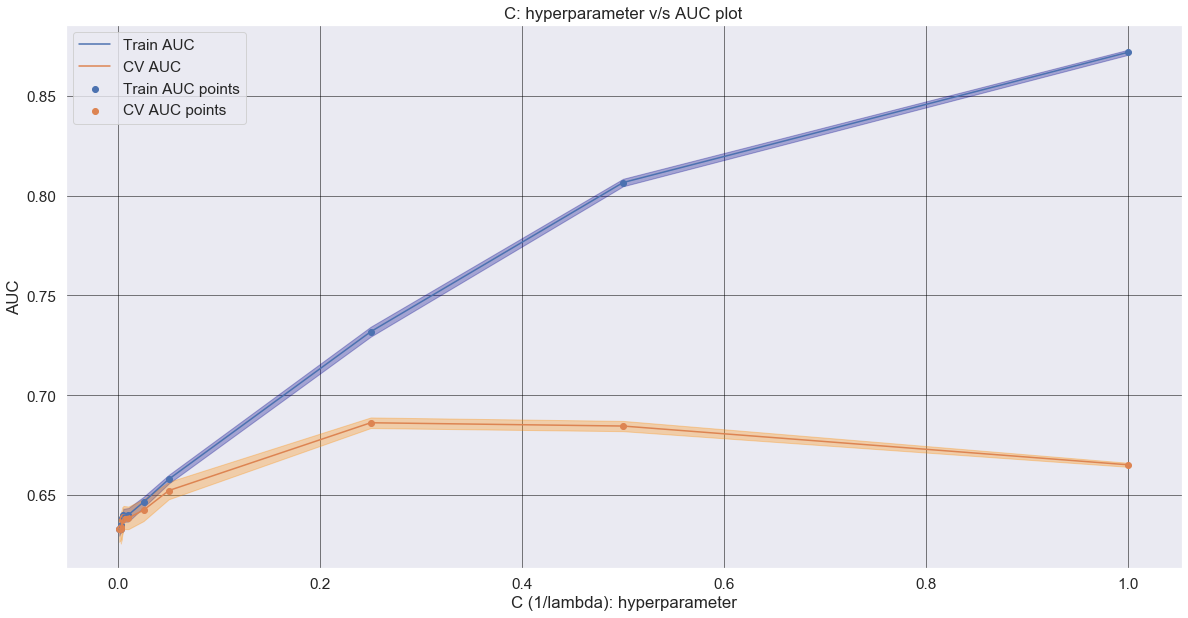

In [108]:
lr = LogisticRegression(penalty='l1',class_weight="balanced")

parameters = {'C':[1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C (1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We observe that as valu of c crosses 0.3 these lines begin to diverge
- So an optimal value of C is obtained at C=0.25

In [109]:
best_c2=clf.best_params_
print(best_c2)

{'C': 0.25}


# B) Training model using best hyperparameter value

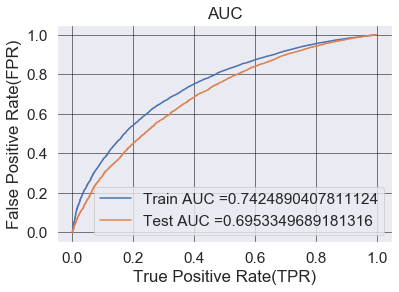

In [110]:
model = LogisticRegression(C = 0.25,penalty='l1',class_weight='balanced')

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We obtain a train AUC of 0.74 and a test AUC of 0.69

## C) confusion matrix

## train data

In [111]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998338499602 for threshold 0.43
[[ 3878  3880]
 [ 7852 35626]]


In [112]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998338499602 for threshold 0.43


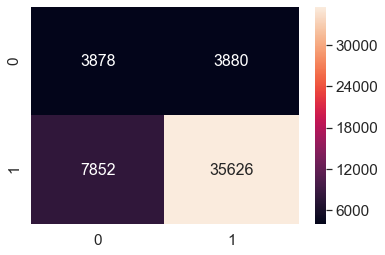

In [113]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe that roughly 36k are true positives and false positives and true negatives are roughly same close to 3900
- Number of false negatives are 7900 roughly

## test data

In [114]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.503
[[ 3109  1854]
 [ 9534 18278]]


In [115]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.503


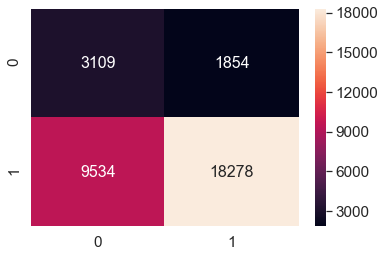

In [116]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- we have roughly 18k as true positives,3100 as true negatives
- The false negatives are approximately 9500

# set3 Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V

In [117]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [118]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A)  gridsearch cv

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=16.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.3min remaining:    0.0s


[CV] C=1 .............................................................
[CV] .............................................. C=1, total=13.5min
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=18.9min
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=15.3min
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total= 7.6min
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total= 7.5min
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=10.1min
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=13.4min
[CV] C

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 124.3min finished


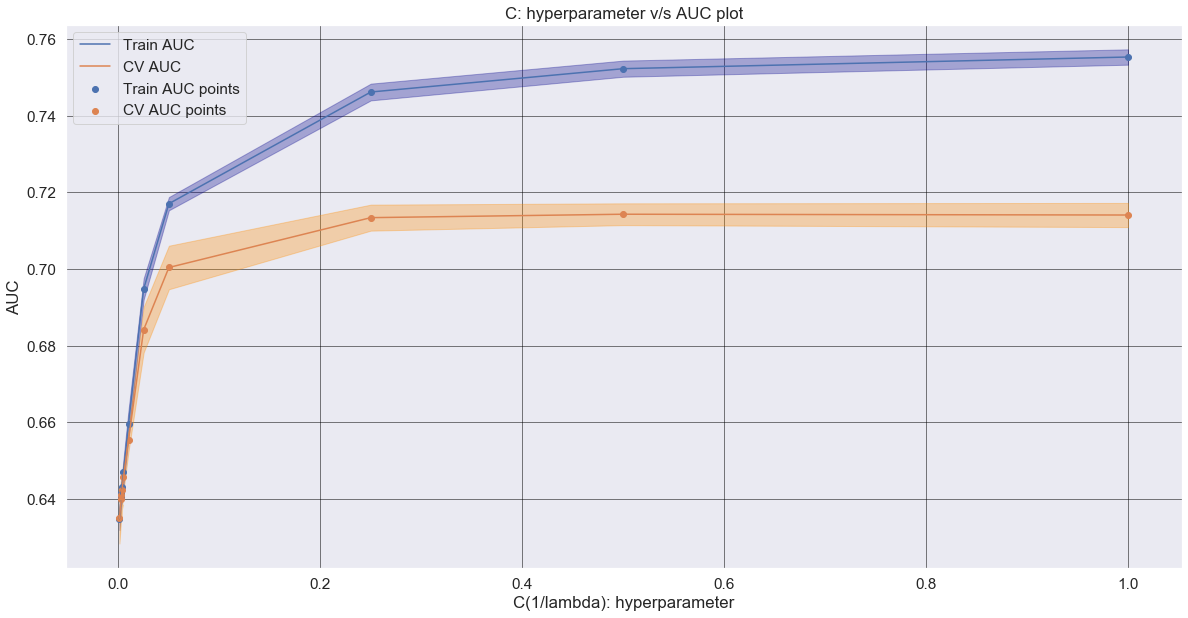

In [119]:
lr = LogisticRegression(penalty='l1',class_weight="balanced")

parameters = {'C':[1,0.5,0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- we observe that as C becomes close to 0.5 both lines seem to become parallel
- So best optimal value of C is 0.5

In [120]:
best_c3=clf.best_params_
print(best_c3)

{'C': 0.5}


 # B) training model using best hyperparameter value

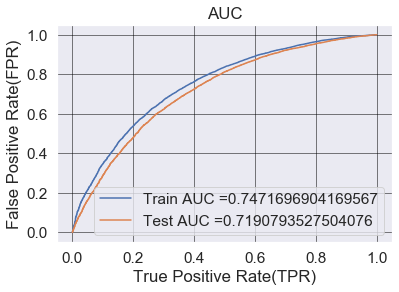

In [121]:
model = LogisticRegression(C=0.5,penalty='l1',class_weight='balanced')

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- we observe a train AUC of 0.74 and a test AUC of 0.71

# confusion matrix

## train data

In [122]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.394
[[ 3879  3879]
 [ 7126 36352]]


In [123]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.394


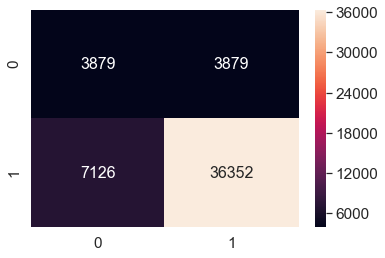

In [124]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe close to 36k true positives in train data

- nearly 7100 are false negatives which are very high

## test data

In [125]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.499
[[ 3232  1731]
 [ 9003 18809]]


In [126]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.499


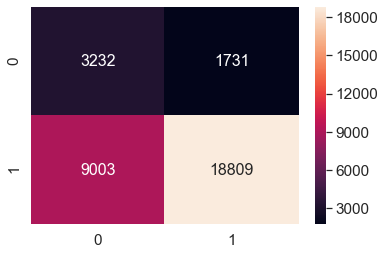

In [127]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe close to 19k true positives

- The number of false negatives is very high close to 9k

# set4 Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [128]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [129]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A) gridsearch

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total= 6.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.9min remaining:    0.0s


[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total= 5.2min
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total= 6.6min
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total= 2.1min
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total=  59.2s
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total= 1.7min
[CV] C=0.025 .........................................................
[CV] .......................................... C=0.025, total=  52.1s
[CV] C=0.025 .........................................................
[CV] .......................................... C=0.025, total=  26.2s
[CV] C

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 28.0min finished


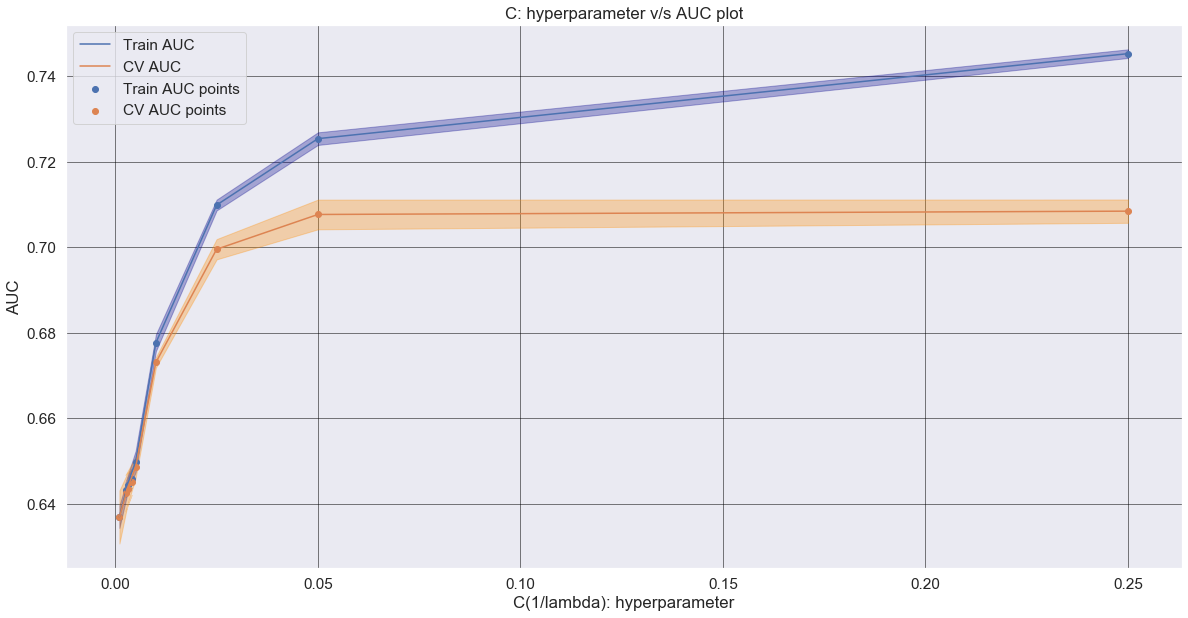

In [130]:

lr = LogisticRegression(penalty='l1',class_weight="balanced")

parameters = {'C':[0.25,0.05,0.025, 0.01, 0.005,0.0025, 0.004, 0.003,0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We see that after C= 0.05 the lines start becoming parallel

- the best value of C is 0.25

In [131]:
best_c4=clf.best_params_
print(best_c4)

{'C': 0.25}


# B) training the model using best hyperparameter value

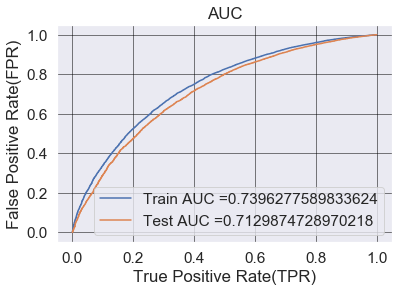

In [133]:
model = LogisticRegression(C = 0.25,penalty="l1",class_weight="balanced")

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- we observe a test AUC of 0.71

# C) Confusion matrix

## train data

In [134]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.4
[[ 3879  3879]
 [ 7580 35898]]


In [135]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.4


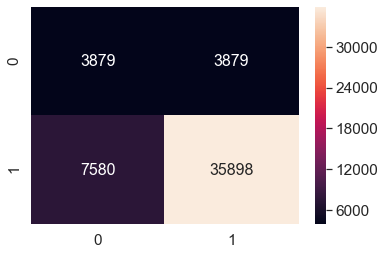

In [136]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe 36k as no of true positives
- nearly 7500 are false negatives

## test data

In [137]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.497
[[ 3234  1729]
 [ 9351 18461]]


In [138]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.497


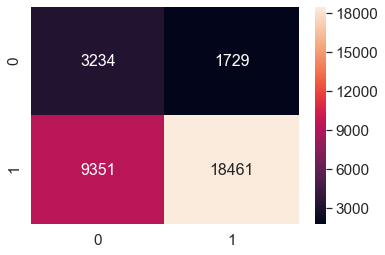

In [139]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- we observe nearly 18500 as true positives
- nearly 9300 are false negatives for test data

# set 5 Categorical features, Numerical features & Essay Sentiments

In [140]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv)).tocsr()

In [141]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 109) (51236,)
(25237, 109) (25237,)
(32775, 109) (32775,)


#  A) gridsearch cv

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   2.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.9s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   2.5s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.6s
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total=   2.3s
[CV] C=0.05 ..........................................................
[CV] ........................................... C=0.05, total=   1.6s
[CV] C

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   37.1s finished


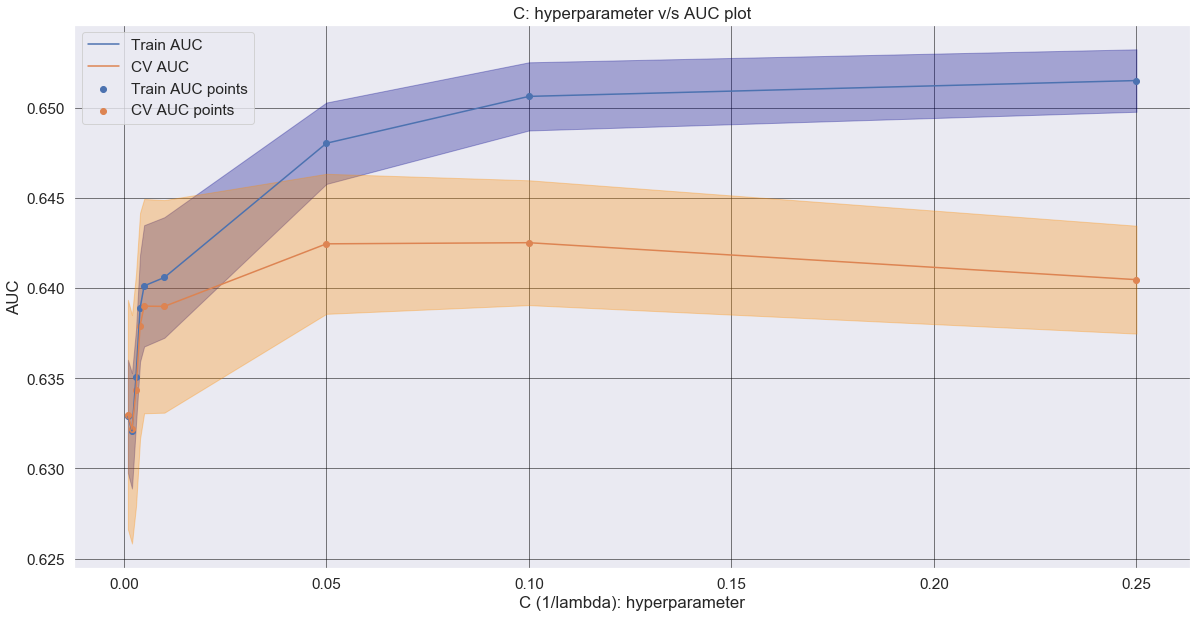

In [142]:
lr = LogisticRegression(penalty='l1',class_weight="balanced")

parameters = {'C':[ 0.25,0.1, 0.05, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C (1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# summary

- we see that after 0.05 lines start diverging
- at C= 0.1 wwe obtain the optimal value

# Summary

In [143]:
best_c5=clf.best_params_
print(best_c5)

{'C': 0.1}


#  B training model using best hyperparameter value

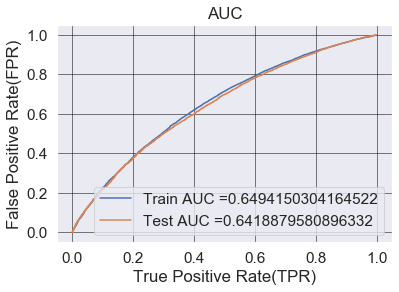

In [144]:
model = LogisticRegression(C = 0.1,penalty='l1',class_weight="balanced")

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We observe AUC( test ) to be 0.64 which is very less as compared to other sets

# confusion matrix


## train data

In [145]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.469
[[ 3879  3879]
 [12449 31029]]


In [146]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.469


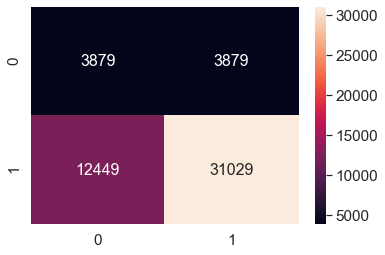

In [147]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- For train data we see 31k true positives and equal number of false positives and true negatives (3879)

- Roughly 12500 are false negatives which are significantly higher in number


## test data

In [149]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.523
[[ 3346  1617]
 [13149 14663]]


In [150]:

conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.523


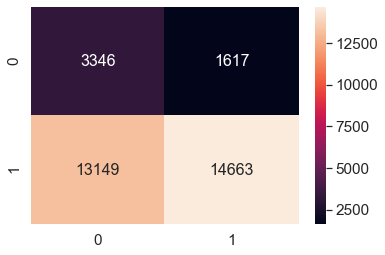

In [151]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- We observe highest no of true positives roughly to 14500
- The no of false negatives are also high close to 13k

# conclusions

In [152]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]

x.add_row(["BOW", "Logistic Regression", 0.05, 0.69])
x.add_row(["TFIDF", "Logistic Regression", 0.25, 0.69])
x.add_row(["AVG W2V", "Logistic Regression", 0.5, 0.71])
x.add_row(["TFIDF W2V", "Logistic Regression", 0.25, 0.71])
x.add_row(["WITHOUT TEXT", "Logistic Regression", 0.1, 0.64])


print(x)

+--------------+---------------------+-----------------------+------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter | AUC  |
+--------------+---------------------+-----------------------+------+
|     BOW      | Logistic Regression |          0.05         | 0.69 |
|    TFIDF     | Logistic Regression |          0.25         | 0.69 |
|   AVG W2V    | Logistic Regression |          0.5          | 0.71 |
|  TFIDF W2V   | Logistic Regression |          0.25         | 0.71 |
| WITHOUT TEXT | Logistic Regression |          0.1          | 0.64 |
+--------------+---------------------+-----------------------+------+


- we observe that avgw2v and tfidf w2v have the best performance out of the 5 sets with AUC of 0.71

- The set with no text features does not perform well as compared to other sets with lowest AUC of 0.64, so we conclude that text features are essential